## W poniższym okienku proszę wpisać swoje **imię, nazwisko i numer grupy**.

*   Imię: Wojciech
*   Nazwisko: Siemiątkowski
*   Grupa: 12c

# **Ruch bryły sztywnej** 

Po przeczytaniu kolejnych podrozdziałów udostępnionych notatek rozwiąż odpowiednie zadania

# Bryła sztywna
> ### układ współrzędnych



**Zadanie 1**

Korzystając z macierzy obrotu obróć wektor $[1,0,0]$ o $\pi/2$ stopni wokół osi $z$.

In [ ]:
# [0, 1, 0]

**Zadanie 2**

Nie odwracając żadnej macierzy pokaż, że dla macierzy obrotu R zachodzi $R^{-1} = R^T$.

In [ ]:
# R(T) * R = I => R2(T) * R(T) = I (pomnożone)

> ### Prędkość



**Zadanie 3**

Policz iloczyn wektorowy i skalarny wektorów a = [1 ,-2 ,2] oraz b = [2 ,3, 2].


In [ ]:
# wektorowy => [-10, 2, 7] skalarny => 0

> ### Przyspieszenie



**Zadanie 4**

Sprawdź tożsamość:

 $A \times (B \times C) = B(A\cdot C) - C(A\cdot B)$,
 
dla wektorów


A = [1, 0, 0], B = [0,1,0], C = [0,0,1]

In [ ]:
# 0

> ### Pęd

**Zadanie 5**

Pokaż, że $\frac{dP}{dt}  = F$ opisuje 
drugie prawo dynamiki Newtona.

In [ ]:
# dP/dt = dmV/dt = m dV/dt = m * a

# **Symulacja wahadła fizycznego**

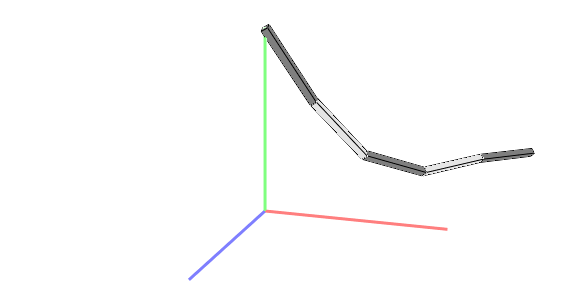

## **Praca Domowa**

1. Obejrzyj filmik o [kwaternionach](https://youtu.be/3BR8tK-LuB0).

2. Zapoznaj się z poniższym kodem symulującym wahadło fizyczne, a następnie w przygotowanej poniżej komórce odpowiedz na pytania:

> a) Jaka metoda jest użyta do rozwiązania równań ruchu?

> b) Sprawdź czy zastosowana w przypadku wahadła matematycznego modyfikacja metody rozwiązującej układ równań korzystnie wpływa na stabilność
numeryczną rozwiązania problemu wahadła fizycznego. A jeśli tak to napisz jaki jest ten wpływ i czy jest zgodny z oczekiwanym.

> c) Czy w poniższym kodzie zostały użyte kwaterniony? Jeśli tak to w jakim celu?


> d) Czemu służą parametry kd i kp? Co by się stało gdyby były one równe zero? Wybór ich wartości jest dość arbitralny, czy potrafisz znaleźć wartości które lepiej spełniały swoje role?

> e) Opisz jak liczona jest energia potencjalna całego wahadła.

> f) Jaki kształt mają poszczególne elementy wahadła? Którą funkcję należałoby zmodyfikować aby zmienić kształt wszystkich elementów?

> g) W poniższej implementacji użyta jest funkcja np.linalg.solve, czy potrafisz powiedzieć jakie równanie ona rozwiązuje?





# Miejsce na odpowiedzi:

a) Euler.

b) Nie wpływa korzystnie. Pogorsza stabilność numeryczność.

c) Tak, do obracania macierzy a tym samym wahadła.

d) Służą stabilizacji rozwiązania równania różniczowego, gdyby przyjąć za nie wartość 0 to całe równanie stałoby się bardzo chaotyczne. Powinny być proporcjonalne do zmianny położenia i prędkości kątowej.

e) Masa elementów wahadła pomnożona przez siłę grawitacji oraz różnicę pozycji górnego końca elementów oraz różnicy punktu zawieszenia danego elementu wahadła z połową długości elementu (co później dalej zmniejszane jest dla każdego elementu).

f) Są to prostopadłościany o wymiarach w, h, d. Należałoby zmodyfikować funkcję set_cuboid

g) Układ równań liniowych dwóch macierzy.

## **Zadanie domowe dla chętnych**

Zmodyfikuj poniższy kod tak, aby rysował położenie (koniec, albo środek masy) najniższego elementu wahadła. Metoda realizacji tego zadania jest dowolna. Może być to wykres, a może być biegnąca z czasem symulacji animacja (tak jak robiliśmy to w grze w życie). Położenie powinno być wyrysowane we współrzędnych x, y. Do zdobycia jest 10p. Punkty te będą traktowane jak dodatkowe, tzn można nimi nadrobić straty z poprzednich prac domowych.

#### Uwaga

Poniższy kod wymaga zewnętrznego pakietu [pyquaternion](http://kieranwynn.github.io/pyquaternion/). **Nie** należy go ściagać! Do instalacji wystarczy wykonać poniższą komórkę.

Kod jest modyfikacją tego [kodu](https://github.com/AliShug/numpy-pendulum).

In [ ]:
!pip install pyquaternion

Początkowe pozycje poszczególnych elementów wahadła:
element 0: [ 0.1767767  1.        -0.1767767]
element 1 [ 0.53033009  1.         -0.53033009]
element 2 [ 0.88388348  1.         -0.88388348]

Rozpoczynam symulację
Rozpoczynam pętle robiącą  6000 kroków symulacji
step: 5999  t=6.00 E=19.10, total energy=21.79


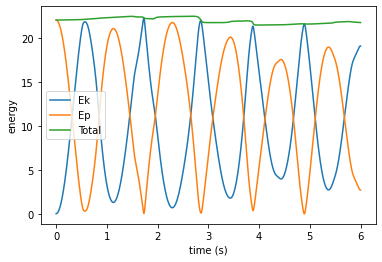

In [ ]:
import sys
import matplotlib.pyplot as plt
from pyquaternion import Quaternion
import numpy as np

# Uwaga liczba elementów wahadła powinna być <= 8.


def funkify(v):
    """
     Macierz skośna dana równaniem (6.8) z notatek LABO8. Jest to macierz 
     zbudowana ze składowych wektora prędkości kątowych. Jej prawostronne
     przemnożenie przez macierz obrotu, R, daje dR/dt.
    """
    return np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])

class Link(object):
    """
      Klasa opisująca elementy wahadła
    """
    def __init__(self):
        # rozmiar
        self.size = [1, 1, 1]
        # masa
        self.mass = 1.0
        # moment bezwładności
        self.inertia = np.identity(3)
        # kwaterniony
        self.q_rot = Quaternion()
        # prędkości kątowe
        self.omega = np.array([0.0, 0.0, 0.0])
        # wspołrzędne górnego końca
        self.pos = np.array([0.0, 0.0, 0.0])
        # prędkości liniowe
        self.vel = np.array([0.0, 0.0, 0.0])

    def set_cuboid(self, mass, w, h, d):
        """
           Inicjalizuje obiekty tworzące wahadło jako prostopadłościany 
           o wymiarach w, h, d (width, depth, height) i masie mass
        """
        self.mass = mass
        self.inertia = mass/12 * np.array([[h**2+d**2, 0, 0], [0, w**2+d**2, 0], [0, 0, w**2+h**2]])
        self.size = np.array([w, h, d])

    def get_r(self):
        """
            Zwraca wektor łączący środek obiektu z jego górnym końcem
        """
        # q_rot.rotation_matrix: 3x3 orthogonal rotation matrix as a 3x3 Numpy array
        return self.q_rot.rotation_matrix @ np.array([0, self.size[1]/2, 0])


class Sim(object):
    def __init__(self):
        self.theta = 0.0
        self.sim_time = 0
        # krok czasowy
        self.dT = 0.001
        # przyspieszenie ziemskie
        self.GRAVITY = -9.81
        # punkt zawieszenia danego elementu wahadła
        self.anchor = np.array([0.0, 1.0, 0.0])
        
        # własności wahadła:
        # długość elementu
        self.link_length = 0.5
        # szerkość (width) elementu wahadła
        self.link_thickness = 0.04
        # masa elementu wahadła
        self.link_mass = 1.0
        # współczynniki proporcjonalne do zmianny położenia i prędkości kątowej
        # mające na celu stabilizacje rozwiązania równania różniczkowego
        self.kp = 20.0
        self.kd = 1.0
        # współczynnik oporu proporcjonalny do prędkości kątowej
        self.damp = 0.001
        # lista elementów wahadła (obiektów klasy Link)
        self.links = []

        self.energies = []
        self.potentials = []
        self.times = []

    def plot_energies(self):
        plt.plot(self.times, self.energies)
        plt.plot(self.times, self.potentials)
        totals = np.array(self.energies) + self.potentials
        plt.plot(self.times, totals)
        plt.legend(('Ek', 'Ep', 'Total'), loc='best')
        plt.ylabel('energy')
        plt.xlabel('time (s)')
        plt.show()

    def reset_sim(self, num_links):
        print("Początkowe pozycje poszczególnych elementów wahadła:")
        self.sim_time = 0

        # Inicjalizacja
        self.links = []
        self.energies = []
        self.potentials = []
        self.times = []

        # Pierwszy element wahadła musi zaczać ruch od pozycji spoczynkowej (pi/2)
        angle = np.pi/2
        axis = np.array([1, 0, 1])
        axis = axis / np.linalg.norm(axis)

        # inicjalizacja elementu
        link = Link()
        link.set_cuboid(self.link_mass, self.link_thickness, self.link_length, self.link_thickness)
        link.q_rot = Quaternion(axis=axis, angle=angle)
        link.pos = self.anchor - link.get_r()
        self.links.append(link)
        print("element 0:", link.pos)

        # pętla po wszystkich elementach wahadła
        for i in range(1, num_links):
            link = Link()
            prev_link = self.links[i-1]
            link.set_cuboid(self.link_mass, self.link_thickness, self.link_length, self.link_thickness)
            link.q_rot = Quaternion(axis=axis, angle=angle)
            link.pos = prev_link.pos - prev_link.get_r() - link.get_r()
            self.links.append(link)
            print("element", i, link.pos)

        print("")

    def simulate_world(self, n):
        print("Rozpoczynam symulację")

        # Grawitacja
        grav = np.array([0, self.GRAVITY, 0])  # linear acceleration = [0, -G, 0]

        # inicjalizacja dużych macierzy przechowujących info o całym wahadle
        dim = len(self.links) * 9
        mat = np.zeros((dim, dim))
        rhs = np.zeros(dim)
        offs = len(self.links) * 6

        print("Rozpoczynam pętle robiącą  " + str(n) + " kroków symulacji")
        for step in range(n):
            # pętla po elementach wahadła, w której będziemy wyliczać 
            # dla każdego elementu wektor rhs i macierz mat
            for i in range(len(self.links)):
                link = self.links[i]
                if i == 0:
                    # pierwszy element jest zaczepiony 'o sufit', wiec nie ma
                    # poprzednika
                    anchor = None
                else:
                    # przypisujemy obiektowi anchor element wahadła do którego
                    # obecnie rozpatrywany element (i-ty) jest przyczepiony
                    anchor = self.links[i-1]
                # prędkość kątowa
                w = link.omega
                # wektor łączący środek elementu z jego górnym końcem
                r = link.get_r()
                # macierz mas jednego elementu
                m = link.mass * np.identity(3)
                # macierz mas całego wahadła
                mat[i*6:i*6+3, i*6:i*6+3] = m
                # masa razy przyspieszenie
                rhs[i*6:i*6+3] = m @ grav + [0, 0, 0]
                # macierz obrotu
                #     lewostronne przepomnozenie wektora położenia punktu przez
                #     macierz obrotu daje współrzędne po obróceniu wokół
                #     wyróżnionej osi, w przypadku kwaternionów wzór jest nieco
                #     inny...
                rot = link.q_rot.rotation_matrix
                # tensor momentu bezwładności obróconego elementu wahadła
                ir = rot @ link.inertia @ rot.T
                # Macierz tensorów bezwładności dla całego wahadła
                mat[i*6+3:i*6+6, i*6+3:i*6+6] = ir
                # macierz skośna
                r_s = funkify(r)

                # Prawa strona równania, które trzeba rozwiązać:
                rhs[i*6+3:i*6+6] = -np.cross(w, ir@w) - self.damp*w - np.cross(r, [0, 0, 0])
                # wyliczenia macierzy mat i rhs dla elementu zerowego:
                if i == 0:
                    pos_drift = (link.pos + r) - self.anchor
                    vel_drift = (link.vel + np.cross(w, r))
                    mat[0:3, offs+i*3:offs+i*3+3] = -np.identity(3)
                    mat[3:6, offs+i*3:offs+i*3+3] = -r_s
                    # first constraint
                    mat[offs+i*3:offs+i*3+3, 0:3] = -np.identity(3)
                    mat[offs+i*3:offs+i*3+3, 3:6] = r_s
                    rhs[offs+i*3:offs+i*3+3] = \
                        np.cross(w, np.cross(w, r)) + \
                        self.kp*pos_drift + self.kd*vel_drift

                # wyliczenia dla pozostałych elementów wahadła:
                else:
                    # pos_drift = zmiana położenia punktu zaczepienia
                    # anchor.pos + ra = nowa pozycja punktu zaczepienia elementu
                    # link.pos   + r  = poprzednia pozycja punktu zaczepienia elementu
                    ra = -anchor.get_r()
                    pos_drift = (link.pos + r) - (anchor.pos + ra)

                    # vel_drift = zmiana prędkości, patrz wzór nad wzorem (6.7)
                    wa = anchor.omega                    
                    vel_drift = (link.vel + np.cross(w, r)) - (anchor.vel + np.cross(wa, ra))

                    mat[i*6-6:i*6-3, offs+i*3:offs+i*3+3] = np.identity(3)                    
                    ra_s = funkify(ra)
                    mat[i*6-3:i*6, offs+i*3:offs+i*3+3] = ra_s
                    mat[i*6:i*6+3, offs+i*3:offs+i*3+3] = -np.identity(3)
                    mat[i*6+3:i*6+6, offs+i*3:offs+i*3+3] = -r_s
                    # intermediate constraints
                    mat[offs+i*3:offs+i*3+3, i*6-6:i*6-3] = -np.identity(3)
                    mat[offs+i*3:offs+i*3+3, i*6-3:i*6] = ra_s
                    mat[offs+i*3:offs+i*3+3, i*6:i*6+3] = np.identity(3)
                    mat[offs+i*3:offs+i*3+3, i*6+3:i*6+6] = -r_s
                    rhs[offs+i*3:offs+i*3+3] = \
                        np.cross(wa, np.cross(wa, ra)) - np.cross(w, np.cross(w, r)) - \
                        self.kp*pos_drift - self.kd*vel_drift

            # rozwiązujemy liniowy układ równań mat = rhs, zeby wyznaczyc
            # predkosci 
            results = np.linalg.solve(mat, rhs)
            # update links
            for i in range(len(self.links)):
                link = self.links[i]
                acc = results[i*6:i*6+3]
                w_dot = results[i*6+3:i*6+6]
                link.pos += link.vel * self.dT
                link.vel += acc * self.dT
                w_mag = np.linalg.norm(link.omega)
                if w_mag != 0.0 and w_mag < 1000000 and not np.isnan(w_mag):
                    axis = link.omega / w_mag
                    link.q_rot *= Quaternion(axis=axis, angle=w_mag*self.dT)  # link.omega[2] * self.dT
                link.omega += w_dot * self.dT

            # uzupełniamy listy o kolejne wyliczone wartości energii
            energy = self.sum_energy()
            self.energies.append(energy[0])
            self.potentials.append(energy[1])
            self.times.append(self.sim_time)
            self.sim_time += self.dT
            

        energy = self.sum_energy()
        print("step:", step, " t=%.2f E=%.2f, total energy=%.2f" % (self.sim_time, energy[0], energy[1]+energy[0]))

        # print("Diff from anchor: ", self.links[0].pos + self.links[0].get_r() - self.anchor)

    def sum_energy(self):
        # energia kinetyczna wahadla: suma Iw^2/2 kazdego elementu
        energy = 0.0
        # energia potencjalna wahadla:
        pe = 0.0
        min_height = self.anchor[1] - 0.5*self.link_length
        for link in self.links:
            energy += 0.5*link.mass*np.linalg.norm(link.vel)**2
            # energy += 0.5*link.inertia[2, 2]*link.omega[2]**2
            w = link.omega
            ir = link.inertia
            # Energia kinetyczna
            energy += 0.5*(ir[0, 0]*w[0]**2 + ir[1, 1]*w[1]**2 + ir[2, 2]*w[2]**2)
            # Energia potencjalna
            pe += link.mass*(-self.GRAVITY)*(link.pos[1] - min_height)
            min_height -= self.link_length
        return energy, pe

    def main(self):
        liczba_krokow_symulacji = 6000
        liczba_elementow_wahadla = 3

        self.reset_sim(liczba_elementow_wahadla)
        self.simulate_world(liczba_krokow_symulacji)
        self.plot_energies()        

sim = Sim()
sim.main()